In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid", "dark_background"])

In [23]:
class CubicSpline:
    def __init__(self, x: np.ndarray, y: np.ndarray, target: np.ndarray) -> None:
        """ Do a cubic spline interpolation.
        Args:
            - x: Array of x coordinates of the data points.
            - y: Array of y coordinates of the data points.
            - target: Points at which to evaluate the spline.
        Returns:
            - The evaluated spline values."""
        self.x : np.ndarray = x # x coordinates of the data points
        self.y : np.ndarray = y # y coordinates of the data points
        self.target = target # x points at which to evaluate the spline

    def calculate_spline_coefficients(self):
        """
        Calculate the coefficients of cubic splines for given data points.

        Parameters:
        - None (data points are stored in the object)
        
        Returns:
        - A matrix of spline coefficients.
        """
        n = len(self.x) - 1
        h = np.diff(self.x) 

        # Calculate the matrix A
        A = np.zeros((n + 1, n + 1))
        A[0, 0] = 1
        A[n, n] = 1
        for i in range(1, n):
            A[i, i - 1] = h[i - 1]
            A[i, i] = 2 * (h[i - 1] + h[i])
            A[i, i + 1] = h[i]

        # Calculate the vector b
        b = np.zeros(n + 1)
        for i in range(1, n):
            b[i] = 3 * ((self.y[i + 1] - self.y[i]) / h[i] - (self.y[i] - self.y[i - 1]) / h[i - 1])

        # Solve the system of linear equations
        m = np.linalg.solve(A, b)

        # Calculate coefficients of the splines
        S = np.zeros((n, 4))
        for i in range(n):
            S[i, 0] = self.y[i]
            S[i, 1] = (self.y[i + 1] - self.y[i]) / h[i] - h[i] * (2 * m[i] + m[i + 1]) / 3
            S[i, 2] = m[i]
            S[i, 3] = (m[i + 1] - m[i]) / (3 * h[i])

        return S
    
    def evaluate_spline(self):
        """
        Evaluate the spline at given points xi.

        Parameters:
        - None (data points and target points are stored in the object)

        Returns:
        - The evaluated spline values.
        """
        n = len(self.x) - 1
        result = np.zeros_like(self.target)
        coeffs = self.calculate_spline_coefficients()

        for j, xj in enumerate(self.target):
            for i in range(n):
                if xj >= self.x[i] and xj <= self.x[i + 1]:
                    dx = xj - self.x[i]
                    result[j] = (coeffs[i, 0] + coeffs[i, 1] * dx + 
                                 coeffs[i, 2] * dx**2 + coeffs[i, 3] * dx**3)
                    break
                
        return result
    
    def plot_spline(self, ax = None) -> None:
        """
        Plot the spline and the data points.

        Parameters:
        - None (data points and target points are stored in the object)

        Returns:
        - None (the plot is shown)
        """
        result = self.evaluate_spline()
        plt.plot(self.x, self.y, 'o', label='Data points')
        plt.plot(self.target, result, label='Cubic spline')
        plt.legend()

        return None

[[ 1.          1.66071429  0.         -0.66071429]
 [ 2.         -0.32142857 -1.98214286  1.30357143]
 [ 1.         -0.375       1.92857143 -1.05357143]
 [ 1.5         0.32142857 -1.23214286  0.41071429]]


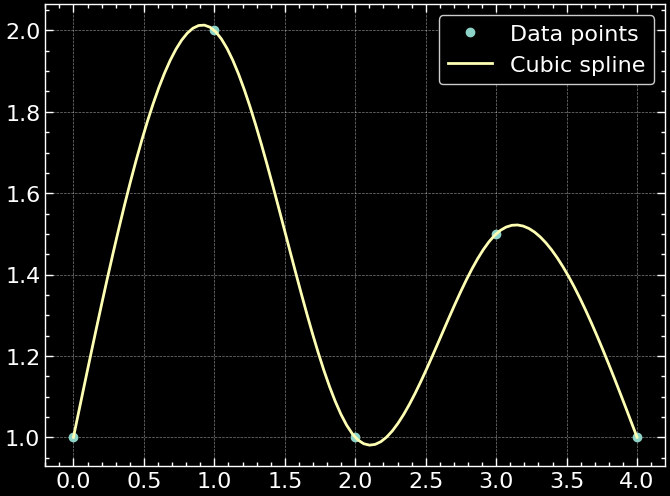

In [24]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 1, 1.5, 1])

target = np.linspace(0, 4, 100)

spline = CubicSpline(x, y, target)
result = spline.evaluate_spline()
coeffs = spline.calculate_spline_coefficients()

spline.plot_spline()
print(coeffs)

In [3]:

def calculate_spline_coefficients(x, y):
    """
    Calculate the coefficients of cubic splines for given data points.
    
    Parameters:
    - x: Array of x coordinates of the data points.
    - y: Array of y coordinates of the data points.
    
    Returns:
    - A matrix of spline coefficients.
    """
    n = len(x) - 1
    h = np.diff(x)
    
    # Calculate the matrix A
    A = np.zeros((n + 1, n + 1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
    
    # Calculate the vector b
    b = np.zeros(n + 1)
    for i in range(1, n):
        b[i] = 3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])
    
    # Solve the system of linear equations
    m = np.linalg.solve(A, b)
    
    # Calculate coefficients of the splines
    S = np.zeros((n, 4))
    for i in range(n):
        S[i, 0] = y[i]
        S[i, 1] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * m[i] + m[i + 1]) / 3
        S[i, 2] = m[i]
        S[i, 3] = (m[i + 1] - m[i]) / (3 * h[i])
    
    return S

def evaluate_spline(x, coeffs, xi):
    """
    Evaluate the spline at given points xi.
    
    Parameters:
    - x: Array of x coordinates of the data points.
    - coeffs: Matrix of spline coefficients.
    - xi: Points at which to evaluate the spline.
    
    Returns:
    - The evaluated spline values.
    """
    n = len(x) - 1
    result = np.zeros_like(xi)
    
    for j, xj in enumerate(xi):
        for i in range(n):
            if xj >= x[i] and xj <= x[i + 1]:
                dx = xj - x[i]
                result[j] = (coeffs[i, 0] + coeffs[i, 1] * dx + 
                             coeffs[i, 2] * dx**2 + coeffs[i, 3] * dx**3)
                break
    
    return result

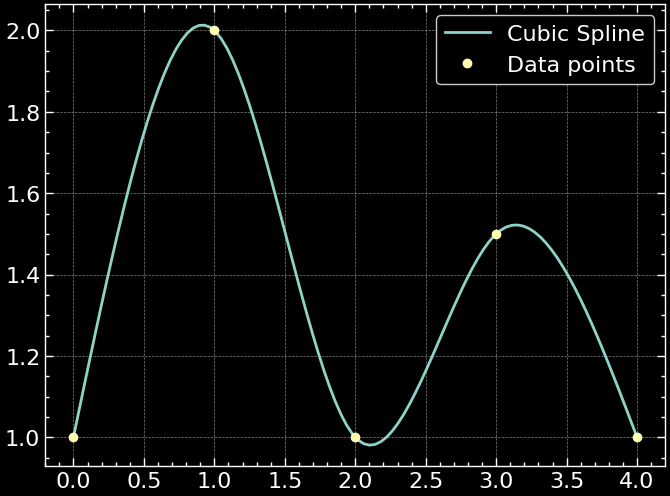

In [7]:
# Example usage
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 1, 1.5, 1])
coeffs = calculate_spline_coefficients(x, y)
xi = np.linspace(0, 4, 100)
yi = evaluate_spline(x, coeffs, xi)

plt.plot(xi, yi, label='Cubic Spline')
plt.plot(x, y, 'o', label='Data points')
plt.legend()
plt.show()
